In [1]:
import os
import torch
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import torch.nn as nn
import torchvision.models as models
import torch.optim as optim
from tqdm import tqdm


In [2]:
model = models.segmentation.deeplabv3_resnet101(weights=models.segmentation.DeepLabV3_ResNet101_Weights.DEFAULT)

#  Modify final classifier for number of classes
num_classes = 6  # Change this based on your dataset
model.classifier[4] = nn.Conv2d(256, num_classes, kernel_size=(1,1))


In [3]:
#  Load the trained model
model.load_state_dict(torch.load("deeplabv3_segmentation.pth"))
model.eval()  # Set model to evaluation mode

print(" Model loaded for inference!")

C:\Users\Asus\AppData\Local\Temp\ipykernel_6308\1315367006.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("deeplabv3_segmentation.pth")

 Model loaded for inference!


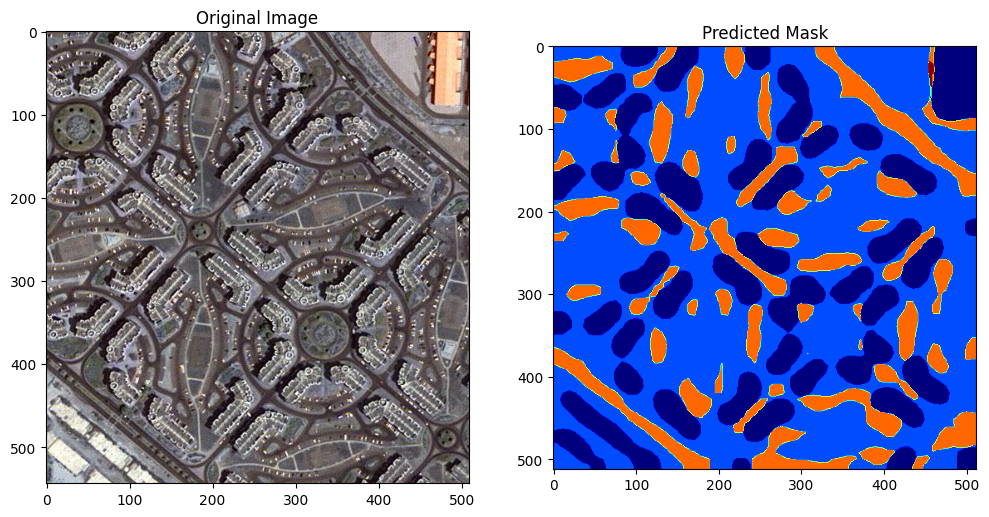

In [4]:
import matplotlib.pyplot as plt
from PIL import Image
import torch
import numpy as np
from torchvision import transforms

# Define device (CPU or GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define the necessary transformations for the image
image_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Example normalization (based on ImageNet)
])

# Custom image path (ensure the image path is correct)
test_img_path = 'E:/object-detect/Geosatelite-image-classification/semantic/image/image_part_001 (2).jpg'  # Path to your image

# Load the image
image = Image.open(test_img_path).convert("RGB")
image_resized = image.resize((512, 512), Image.BILINEAR)  # Resize to model input size
input_tensor = image_transform(image_resized).unsqueeze(0).to(device)  # Add batch dimension and move to device (GPU/CPU)

# Move the model to the same device as input_tensor
model.to(device)

# Run the model on the image
with torch.no_grad():
    output = model(input_tensor)["out"]
    predicted_mask = torch.argmax(output, dim=1).squeeze().cpu().numpy()  # Get class with highest probability

# Show Image and Predicted Mask
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(image)
ax[0].set_title("Original Image")
ax[1].imshow(predicted_mask, cmap="jet")
ax[1].set_title("Predicted Mask")
plt.show()


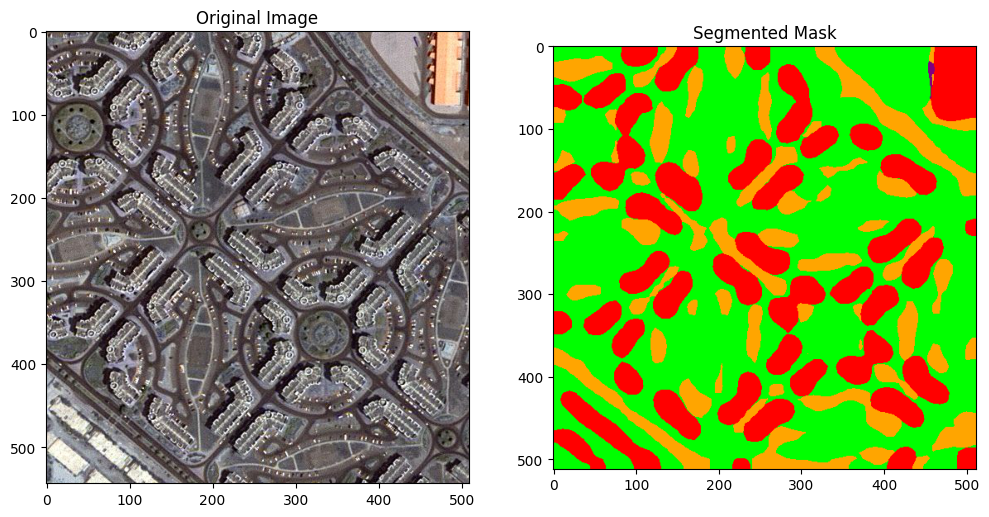

Area distribution by color:
Color Red: 26.76%
Color Green: 54.92%
Color Orange: 18.25%
Color Purple: 0.07%


In [8]:
import matplotlib.pyplot as plt
from PIL import Image
import torch
import numpy as np
from torchvision import transforms
import cv2

# Define device (CPU or GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define the necessary transformations for the image
image_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Example normalization (based on ImageNet)
])

# Custom image path (ensure the image path is correct)
test_img_path = 'E:/object-detect/Geosatelite-image-classification/semantic/image/image_part_001 (2).jpg'  # Path to your image

# Load the image
image = Image.open(test_img_path).convert("RGB")
image_resized = image.resize((512, 512), Image.BILINEAR)  # Resize to model input size
input_tensor = image_transform(image_resized).unsqueeze(0).to(device)  # Add batch dimension and move to device (GPU/CPU)

# Move the model to the same device as input_tensor
model.to(device)

# Run the model on the image
with torch.no_grad():
    output = model(input_tensor)["out"]
    predicted_mask = torch.argmax(output, dim=1).squeeze().cpu().numpy()  # Get class with highest probability

# Define fixed colors for each class (so they're consistent)
color_palette = {
    (255, 0, 0): "Red",
    (0, 255, 0): "Green",
    (0, 0, 255): "Blue",
    (255, 255, 0): "Yellow",
    (255, 165, 0): "Orange",
    (128, 0, 128): "Purple",
    (0, 255, 255): "Cyan",
    (255, 192, 203): "Pink"
}
num_classes = min(np.max(predicted_mask) + 1, len(color_palette))

color_mask = np.zeros((predicted_mask.shape[0], predicted_mask.shape[1], 3), dtype=np.uint8)
color_keys = list(color_palette.keys())
for class_id in range(num_classes):
    color_mask[predicted_mask == class_id] = color_keys[class_id]

# Compute area percentage for each color
unique, counts = np.unique(predicted_mask, return_counts=True)
total_pixels = predicted_mask.size
area_percentages = {color_palette[color_keys[int(cls)]]: round((cnt / total_pixels) * 100, 2) for cls, cnt in zip(unique, counts)}

# Show Image and Predicted Mask
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(image)
ax[0].set_title("Original Image")
ax[1].imshow(color_mask)
ax[1].set_title("Segmented Mask")
plt.show()

# Print area percentage for each color
print("Area distribution by color:")
for color_name, percentage in area_percentages.items():
    print(f"Color {color_name}: {percentage}%")


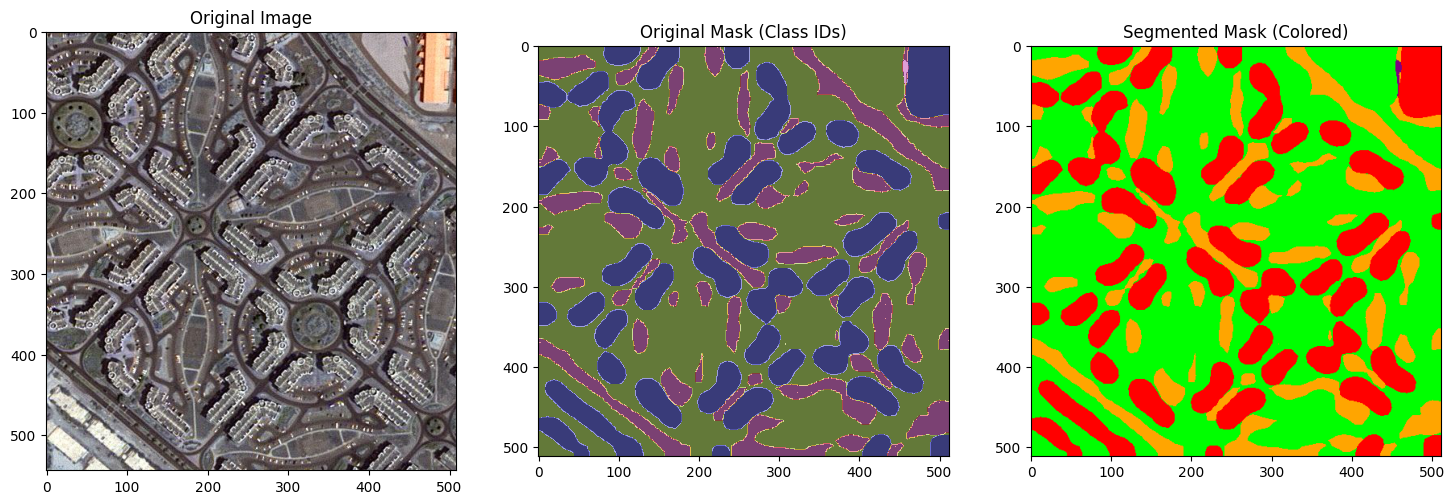

Area distribution by color:
Color Red: 26.76%
Color Green: 54.92%
Color Orange: 18.25%
Color Purple: 0.07%


In [20]:
import matplotlib.pyplot as plt
from PIL import Image
import torch
import numpy as np
from torchvision import transforms
import cv2

# Define device (CPU or GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define the necessary transformations for the image
image_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Example normalization (based on ImageNet)
])

# Custom image path (ensure the image path is correct)
test_img_path = 'E:/object-detect/Geosatelite-image-classification/semantic/image/image_part_001 (2).jpg'  # Path to your image

# Load the image
image = Image.open(test_img_path).convert("RGB")
image_resized = image.resize((512, 512), Image.BILINEAR)  # Resize to model input size
input_tensor = image_transform(image_resized).unsqueeze(0).to(device)  # Add batch dimension and move to device (GPU/CPU)

# Move the model to the same device as input_tensor
model.to(device)

# Run the model on the image
with torch.no_grad():
    output = model(input_tensor)["out"]
    predicted_mask = torch.argmax(output, dim=1).squeeze().cpu().numpy()  # Get class with highest probability

# Define fixed colors for each class (so they're consistent)
color_palette = {
    (255, 0, 0): "Red",
    (0, 255, 0): "Green",
    (0, 0, 255): "Blue",
    (255, 255, 0): "Yellow",
    (255, 165, 0): "Orange",
    (128, 0, 128): "Purple",
    (0, 255, 255): "Cyan",
    (255, 192, 203): "Pink"
}
num_classes = min(np.max(predicted_mask) + 1, len(color_palette))

color_mask = np.zeros((predicted_mask.shape[0], predicted_mask.shape[1], 3), dtype=np.uint8)
color_keys = list(color_palette.keys())
for class_id in range(num_classes):
    color_mask[predicted_mask == class_id] = color_keys[class_id]

# Compute area percentage for each color
unique, counts = np.unique(predicted_mask, return_counts=True)
total_pixels = predicted_mask.size
area_percentages = {color_palette[color_keys[int(cls)]]: round((cnt / total_pixels) * 100, 2) for cls, cnt in zip(unique, counts)}

# Show Image and Masks (Original Mask + Segmented Mask)
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
ax[0].imshow(image)
ax[0].set_title("Original Image")
ax[1].imshow(predicted_mask, cmap='tab20b')  # Original mask image (grayscale with class IDs)
ax[1].set_title("Original Mask (Class IDs)")
ax[2].imshow(color_mask)
ax[2].set_title("Segmented Mask (Colored)")
plt.show()

# Print area percentage for each color
print("Area distribution by color:")
for color_name, percentage in area_percentages.items():
    print(f"Color {color_name}: {percentage}%")


In [6]:
!pip install geopandas


   ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
    --------------------------------------- 0.3/16.2 MB ? eta -:--:--
    --------------------------------------- 0.3/16.2 MB ? eta -:--:--
   - -------------------------------------- 0.5/16.2 MB 578.7 kB/s eta 0:00:28
   - -------------------------------------- 0.5/16.2 MB 578.7 kB/s eta 0:00:28
   - -------------------------------------- 0.8/16.2 MB 745.8 kB/s eta 0:00:21
   -- ------------------------------------- 1.0/16.2 MB 739.8 kB/s eta 0:00:21
   -- ------------------------------------- 1.0/16.2 MB 739.8 kB/s eta 0:00:21
   --- ------------------------------------ 1.3/16.2 MB 753.8 kB/s eta 0:00:20
   --- ------------------------------------ 1.6/16.2 MB 783.9 kB/s eta 0:00:19
   --- ------------------------------------ 1.6/16.2 MB 783.9 kB/s eta 0:00:19
   ---- ----------------------------------- 1.8/16.2 MB 818.3 kB/s eta 0:00:18
   ----- ---------------------------------- 2.1/16.2 MB 857.1 kB/s eta 0:00:17


c:\Users\Asus\miniconda3\envs\dl\Lib\site-packages\pyogrio\geopandas.py:662: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  write(


Shapefile saved: segmentation_result.shp


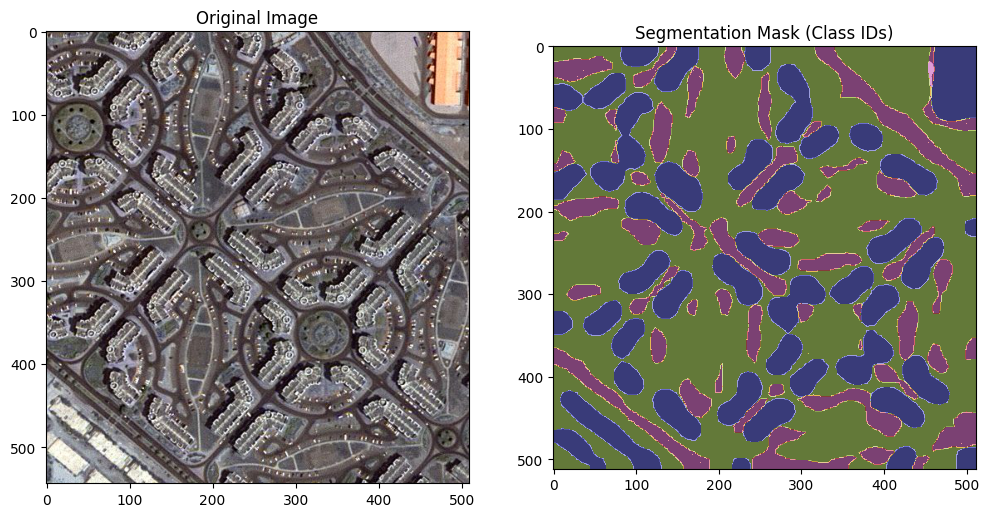

In [7]:
import matplotlib.pyplot as plt
from PIL import Image
import torch
import numpy as np
import cv2
import geopandas as gpd
from shapely.geometry import Polygon
from torchvision import transforms

# Define device (CPU or GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define the necessary transformations for the image
image_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Example normalization (based on ImageNet)
])

# Custom image path (ensure the image path is correct)
test_img_path = 'E:/object-detect/Geosatelite-image-classification/semantic/image/image_part_001 (2).jpg'

# Load the image
image = Image.open(test_img_path).convert("RGB")
image_resized = image.resize((512, 512), Image.BILINEAR)
input_tensor = image_transform(image_resized).unsqueeze(0).to(device)

# Move model to device and perform inference
model.to(device)
with torch.no_grad():
    output = model(input_tensor)["out"]
    predicted_mask = torch.argmax(output, dim=1).squeeze().cpu().numpy()

# Convert segmentation mask to vector (shapefile)
def mask_to_shapefile(mask, output_shapefile="segmentation_result.shp"):
    polygons = []
    class_ids = []

    # Iterate through unique classes in the mask
    unique_classes = np.unique(mask)
    for class_id in unique_classes:
        binary_mask = (mask == class_id).astype(np.uint8)  # Convert class pixels to binary (0 or 1)

        # Find contours of the binary mask
        contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
        for contour in contours:
            if len(contour) > 2:  # Ensure it forms a valid polygon
                polygon = Polygon(contour.squeeze())  # Convert contour to a polygon
                polygons.append(polygon)
                class_ids.append(class_id)

    # Create GeoDataFrame
    gdf = gpd.GeoDataFrame({"class_id": class_ids, "geometry": polygons})
    gdf.to_file(output_shapefile, driver="ESRI Shapefile")

    print(f"Shapefile saved: {output_shapefile}")

# Save the mask as a shapefile
mask_to_shapefile(predicted_mask, "segmentation_result.shp")

# Display the original image and segmented mask
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(image)
ax[0].set_title("Original Image")
ax[1].imshow(predicted_mask, cmap="tab20b")
ax[1].set_title("Segmentation Mask (Class IDs)")
plt.show()


In [9]:
!pip install svgwrite

SVG vector mask saved as: mask_vector.svg


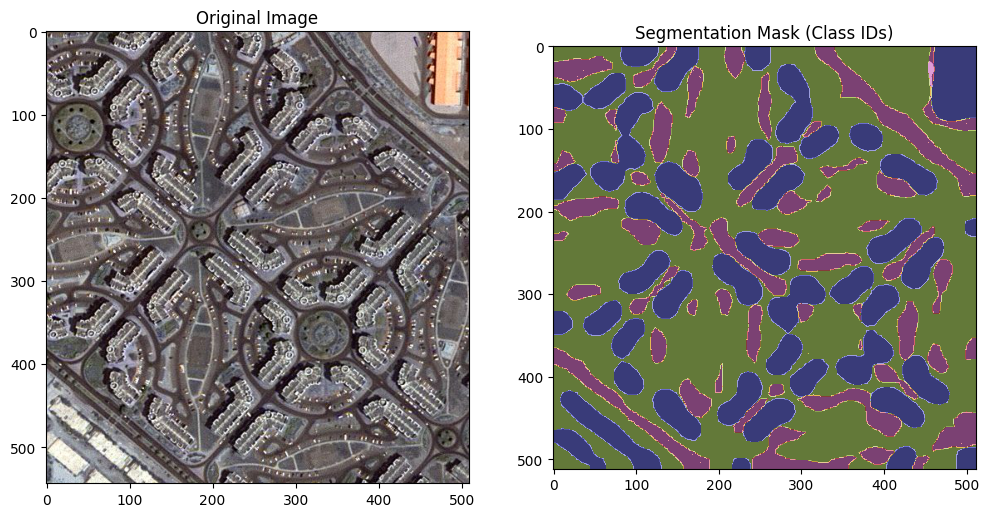

In [10]:
import cv2
import numpy as np
import svgwrite
from PIL import Image
import torch
from torchvision import transforms
import matplotlib.pyplot as plt

# Define device (CPU or GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define transformations for the image
image_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Example normalization (based on ImageNet)
])

# Image path (update with correct path)
test_img_path = 'E:/object-detect/Geosatelite-image-classification/semantic/image/image_part_001 (2).jpg'

# Load and preprocess the image
image = Image.open(test_img_path).convert("RGB")
image_resized = image.resize((512, 512), Image.BILINEAR)
input_tensor = image_transform(image_resized).unsqueeze(0).to(device)

# Move model to device and perform inference
model.to(device)
with torch.no_grad():
    output = model(input_tensor)["out"]
    predicted_mask = torch.argmax(output, dim=1).squeeze().cpu().numpy()

# Function to generate an SVG file from the mask
def mask_to_svg(mask, output_svg="mask_vector.svg"):
    h, w = mask.shape
    dwg = svgwrite.Drawing(output_svg, size=(w, h))
    
    # Define colors for each class (ensure enough colors)
    color_palette = ["red", "green", "blue", "yellow", "orange", "purple", "cyan", "pink"]
    num_classes = min(np.max(mask) + 1, len(color_palette))

    # Convert mask into vector contours
    for class_id in range(num_classes):
        binary_mask = (mask == class_id).astype(np.uint8)
        contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
        for contour in contours:
            if len(contour) > 2:  # Ensure valid polygon
                points = [(int(p[0][0]), int(p[0][1])) for p in contour]
                dwg.add(dwg.polygon(points, fill=color_palette[class_id], stroke="black", stroke_width=1))

    dwg.save()
    print(f"SVG vector mask saved as: {output_svg}")

# Save the mask as an SVG vector file
mask_to_svg(predicted_mask, "mask_vector.svg")

# Display the original image and segmented mask
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(image)
ax[0].set_title("Original Image")
ax[1].imshow(predicted_mask, cmap="tab20b")
ax[1].set_title("Segmentation Mask (Class IDs)")
plt.show()


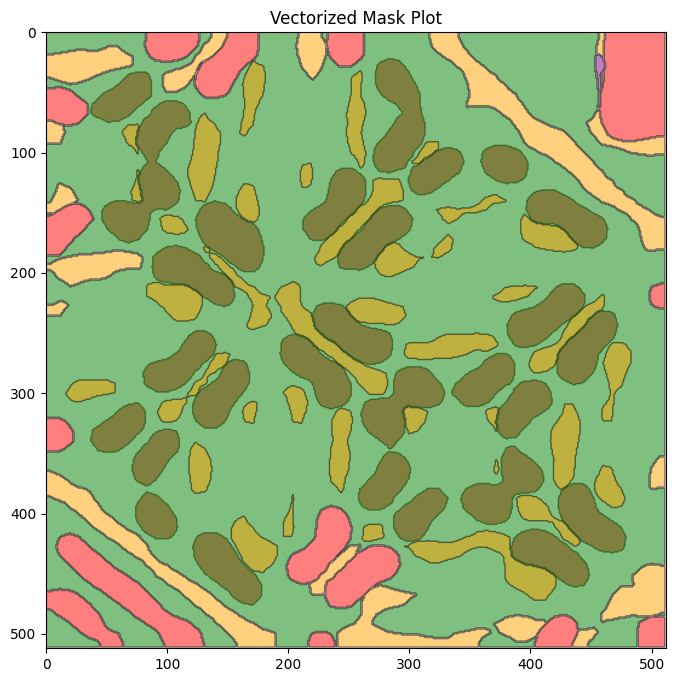

In [11]:
import cv2
import numpy as np
import torch
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import transforms
from matplotlib.patches import Polygon

# Define device (CPU or GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define transformations for the image
image_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Example normalization (based on ImageNet)
])

# Image path (update with correct path)
test_img_path = 'E:/object-detect/Geosatelite-image-classification/semantic/image/image_part_001 (2).jpg'

# Load and preprocess the image
image = Image.open(test_img_path).convert("RGB")
image_resized = image.resize((512, 512), Image.BILINEAR)
input_tensor = image_transform(image_resized).unsqueeze(0).to(device)

# Move model to device and perform inference
model.to(device)
with torch.no_grad():
    output = model(input_tensor)["out"]
    predicted_mask = torch.argmax(output, dim=1).squeeze().cpu().numpy()

# Function to plot the vectorized mask
def plot_vectorized_mask(mask):
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_xlim(0, mask.shape[1])
    ax.set_ylim(mask.shape[0], 0)  # Invert Y-axis to match image coordinates
    
    # Define colors for each class (ensure enough colors)
    color_palette = ["red", "green", "blue", "yellow", "orange", "purple", "cyan", "pink"]
    num_classes = min(np.max(mask) + 1, len(color_palette))

    # Extract contours and plot as polygons
    for class_id in range(num_classes):
        binary_mask = (mask == class_id).astype(np.uint8)
        contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
        for contour in contours:
            if len(contour) > 2:  # Ensure valid polygon
                polygon = Polygon(contour.squeeze(), edgecolor="black", facecolor=color_palette[class_id], alpha=0.5)
                ax.add_patch(polygon)

    ax.set_title("Vectorized Mask Plot")
    plt.show()

# Display the vectorized mask as a plot
plot_vectorized_mask(predicted_mask)
